In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [145]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [146]:
train=pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv") 
test=pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

In [147]:
train.columns



Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [148]:
train.dtypes



id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [149]:
train.shape



(58645, 13)

In [150]:
train.head

<bound method NDFrame.head of           id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDICA

In [151]:
train.tail

<bound method NDFrame.tail of           id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDICA

In [152]:
print("Missing values in the train dataset:")
print(train.isnull().sum())

Missing values in the train dataset:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


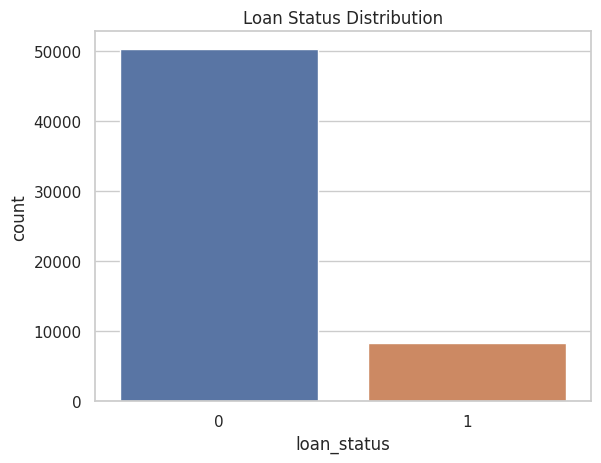

In [153]:


# Plot the distribution of the target variable
sns.countplot(x='loan_status', data=train)
plt.title('Loan Status Distribution')
plt.show()


In [154]:
categorical_features = train.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_features)

for col in categorical_features:
    print(f"{col} value counts:")
    print(train[col].value_counts())

Categorical features: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
person_home_ownership value counts:
person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
loan_intent value counts:
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
loan_grade value counts:
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
cb_person_default_on_file value counts:
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


In [155]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
print("numerical features:", numerical_features)

for col in numerical_features:
    print(f"{col} value counts:")
    print(train[col].value_counts())

numerical features: Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')
id value counts:
id
0        1
39089    1
39091    1
39092    1
39093    1
        ..
19551    1
19552    1
19553    1
19554    1
58644    1
Name: count, Length: 58645, dtype: int64
person_age value counts:
person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        

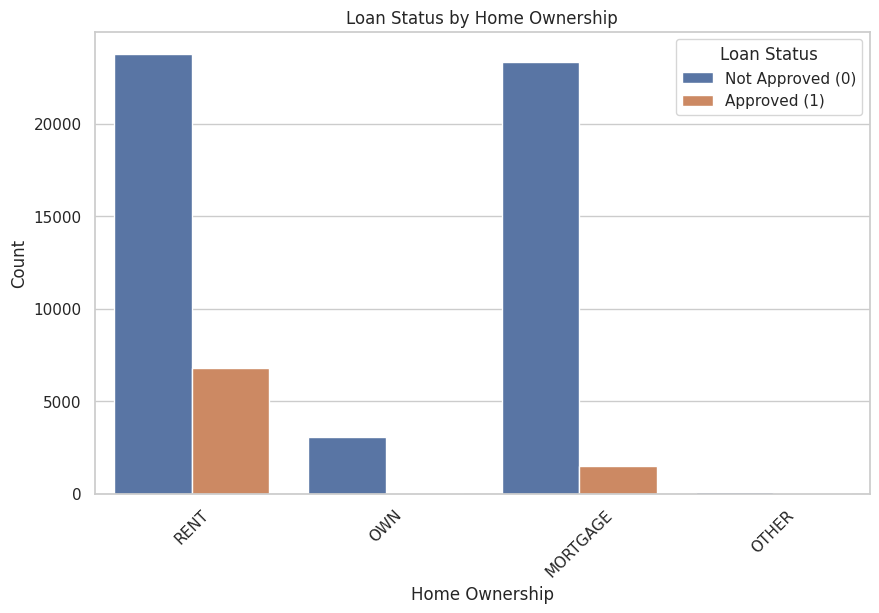

In [156]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='person_home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Not Approved (0)', 'Approved (1)'])
plt.xticks(rotation=45)
plt.show()


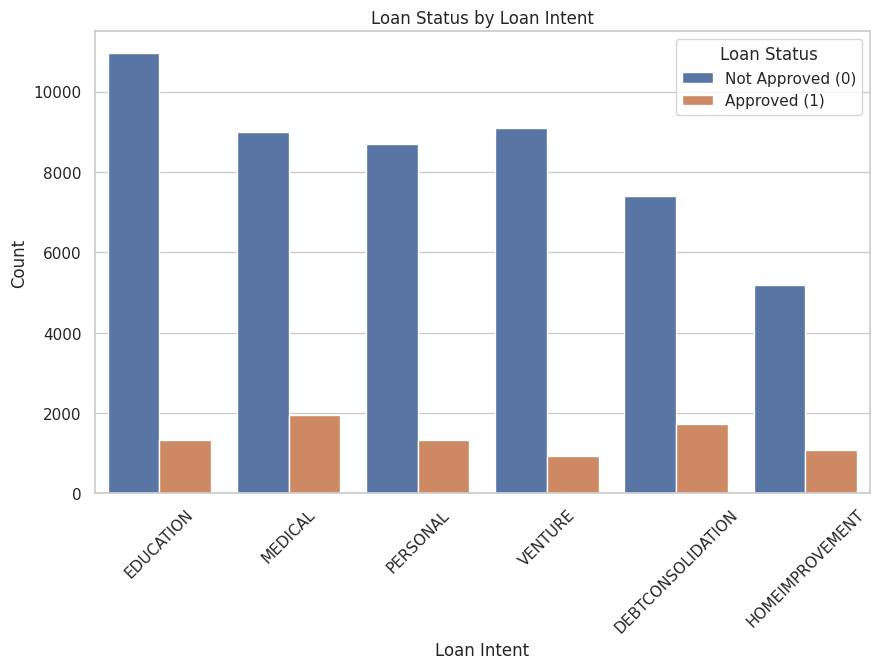

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='loan_intent', hue='loan_status')
plt.title('Loan Status by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Not Approved (0)', 'Approved (1)'])
plt.xticks(rotation=45)
plt.show()


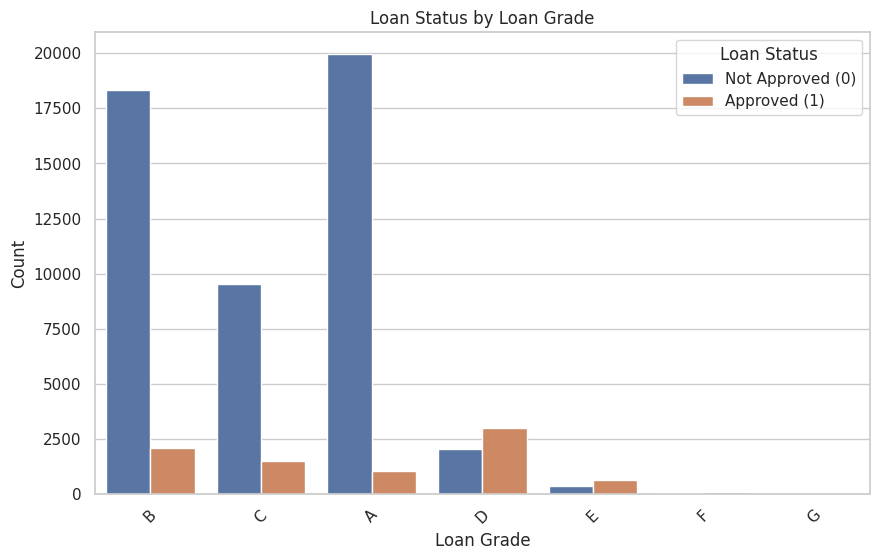

In [158]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='loan_grade', hue='loan_status')
plt.title('Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Not Approved (0)', 'Approved (1)'])
plt.xticks(rotation=45)
plt.show()


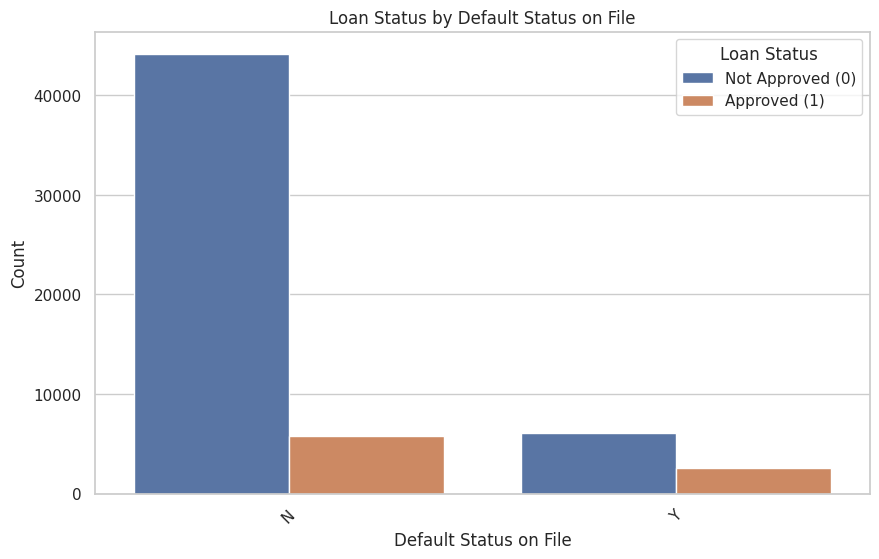

In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='cb_person_default_on_file', hue='loan_status')
plt.title('Loan Status by Default Status on File')
plt.xlabel('Default Status on File')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Not Approved (0)', 'Approved (1)'])
plt.xticks(rotation=45)
plt.show()


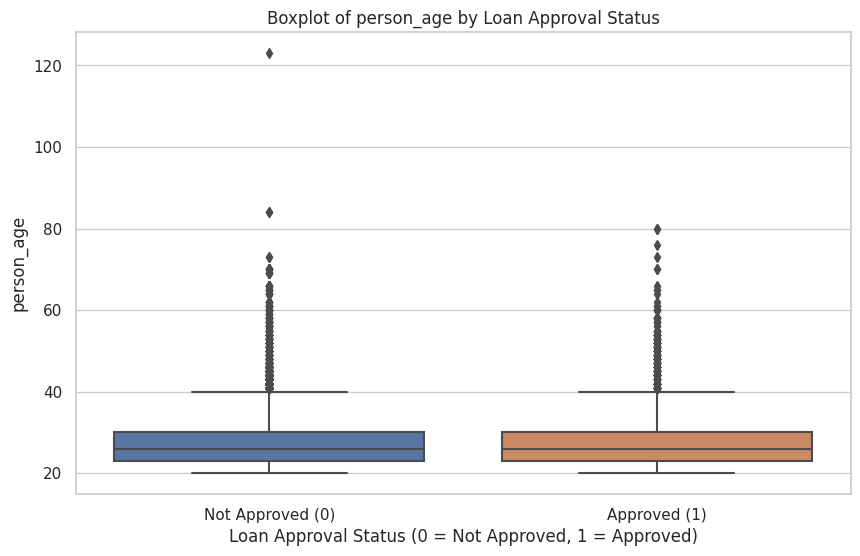

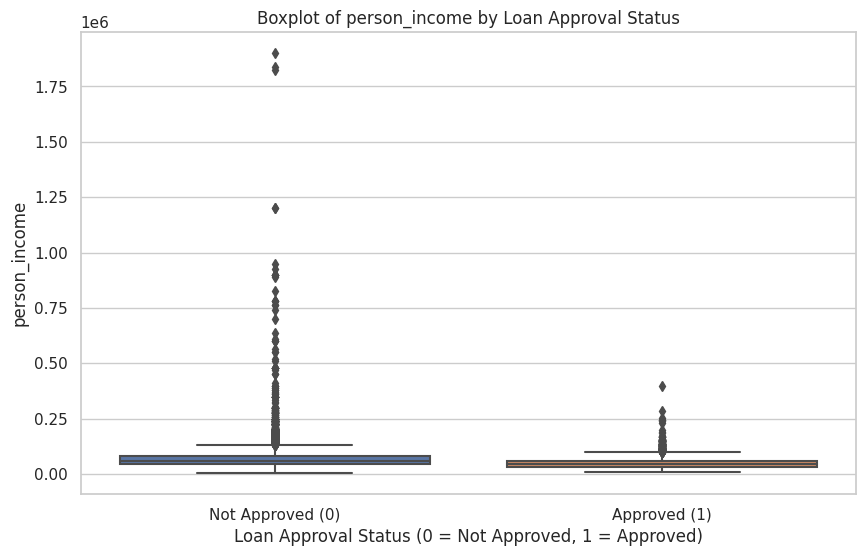

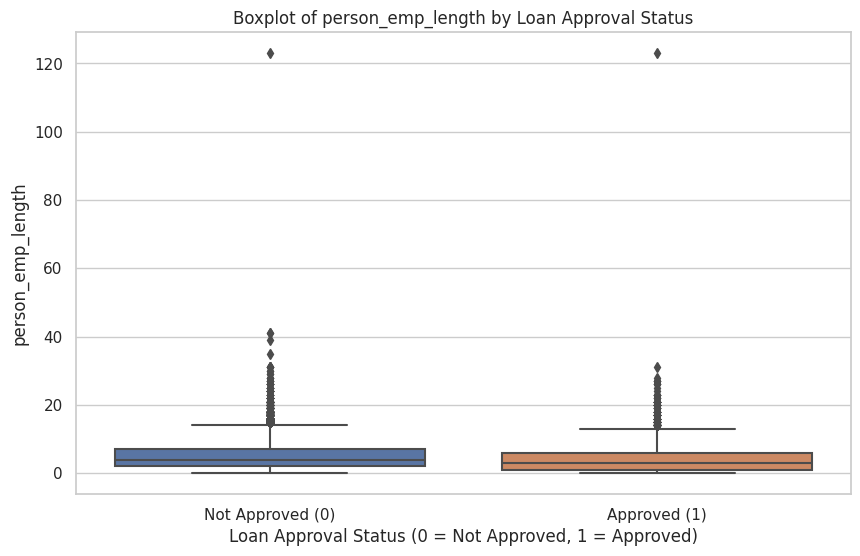

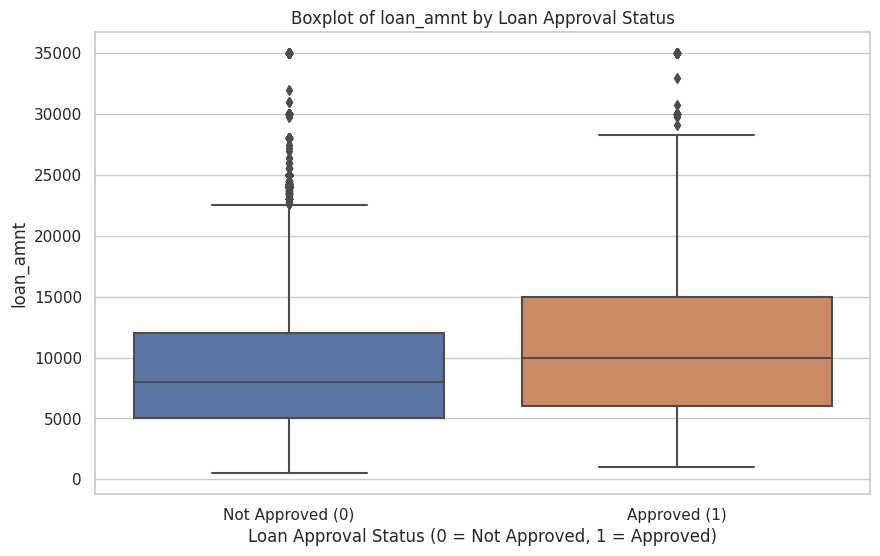

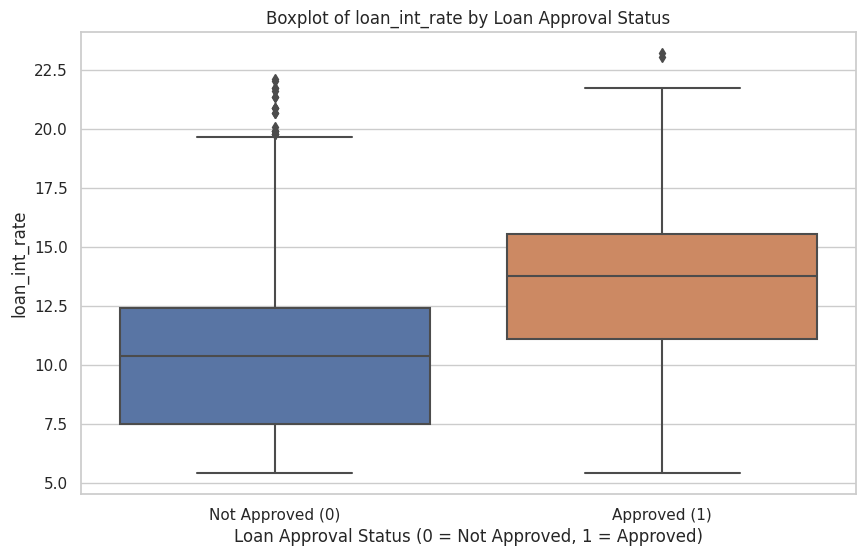

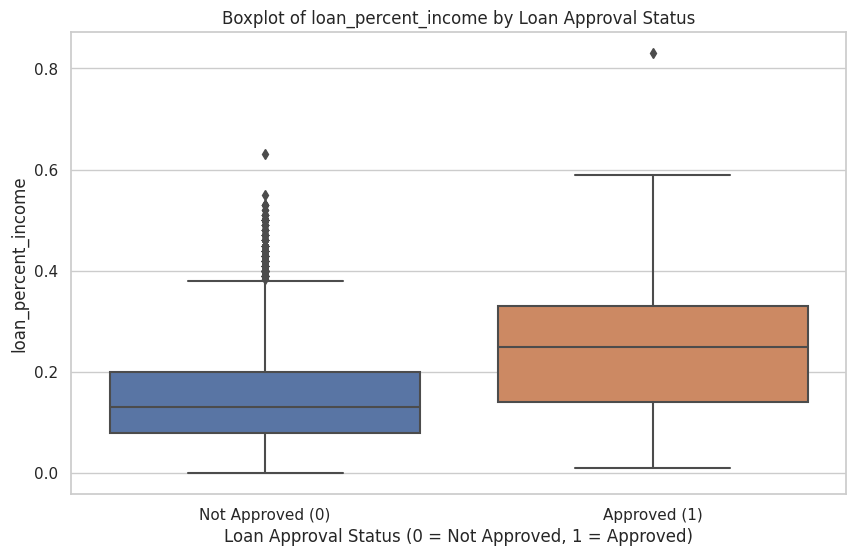

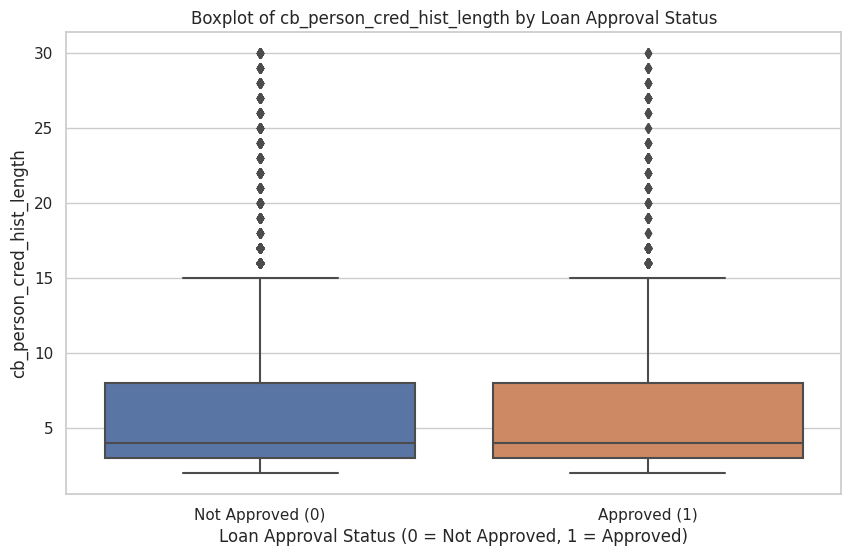

In [160]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Define the numerical features
numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Create boxplots for each numerical feature against loan status
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=feature, data=train)
    plt.title(f'Boxplot of {feature} by Loan Approval Status')
    plt.xlabel('Loan Approval Status (0 = Not Approved, 1 = Approved)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Not Approved (0)', 'Approved (1)'])  # Customize x-ticks
    plt.show()


In [161]:
import pandas as pd
from scipy import stats

# Load the dataset
train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")

# Identify numerical features manually
numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# 1. Correlation Analysis
correlation_matrix = train[numerical_features + ['loan_status']].corr()
loan_status_correlation = correlation_matrix['loan_status'].drop('loan_status')

print("Correlation with loan status:")
print(loan_status_correlation)

# 2. Statistical Tests
for feature in numerical_features:
    # Skip the loan_status feature itself
    group_0 = train[train['loan_status'] == 0][feature]
    group_1 = train[train['loan_status'] == 1][feature]
    
    # Check if both groups are non-empty before performing t-test
    if len(group_0) > 0 and len(group_1) > 0:
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
        print(f"\nFeature: {feature}")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    else:
        print(f"\nFeature: {feature} - One of the groups is empty. Cannot perform t-test.")

# 3. Descriptive Statistics
descriptive_stats = train.groupby('loan_status')[numerical_features].describe()
print("\nDescriptive Statistics by Loan Status:")
print(descriptive_stats)


Correlation with loan status:
person_age                   -0.001130
person_income                -0.169956
person_emp_length            -0.100428
loan_amnt                     0.144982
loan_int_rate                 0.338948
loan_percent_income           0.378280
cb_person_cred_hist_length   -0.003030
Name: loan_status, dtype: float64

Feature: person_age
T-statistic: 0.2622, P-value: 0.7932

Feature: person_income
T-statistic: 61.1506, P-value: 0.0000

Feature: person_emp_length
T-statistic: 24.7157, P-value: 0.0000

Feature: loan_amnt
T-statistic: -30.9162, P-value: 0.0000

Feature: loan_int_rate
T-statistic: -83.2545, P-value: 0.0000

Feature: loan_percent_income
T-statistic: -73.8464, P-value: 0.0000

Feature: cb_person_cred_hist_length
T-statistic: 0.7101, P-value: 0.4776

Descriptive Statistics by Loan Status:
            person_age                                                      \
                 count       mean       std   min   25%   50%   75%    max   
loan_status     

                 id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%   

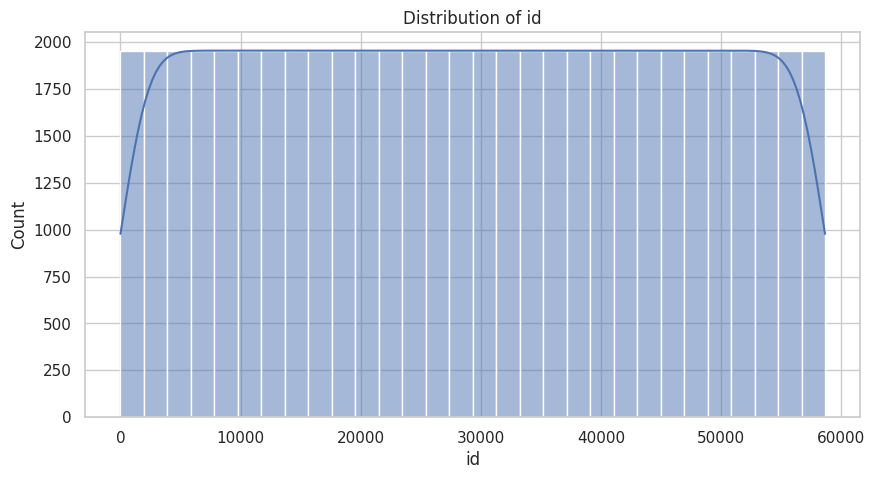

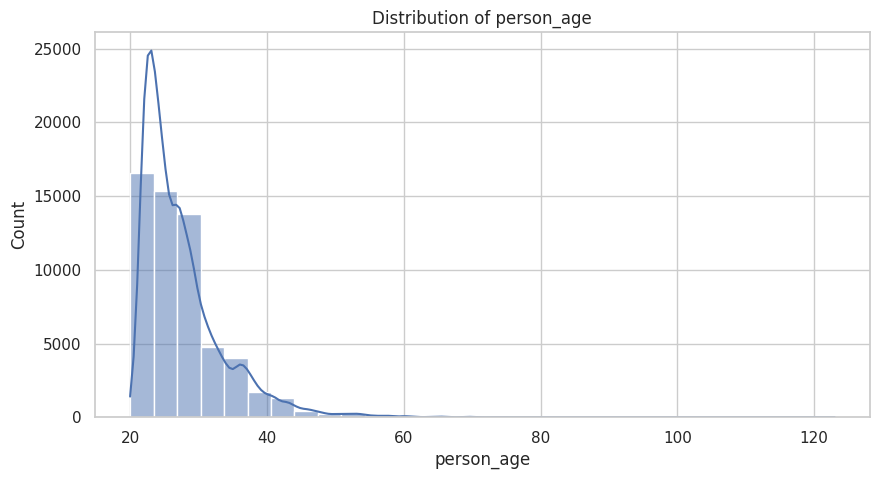

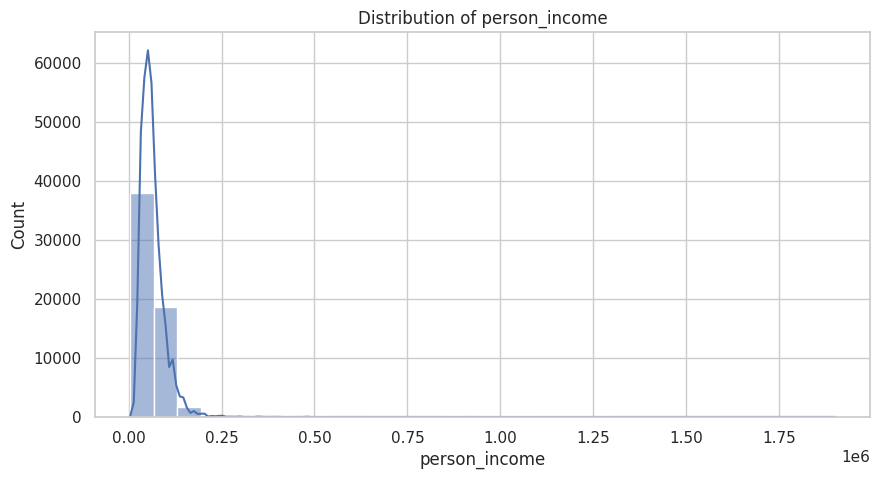

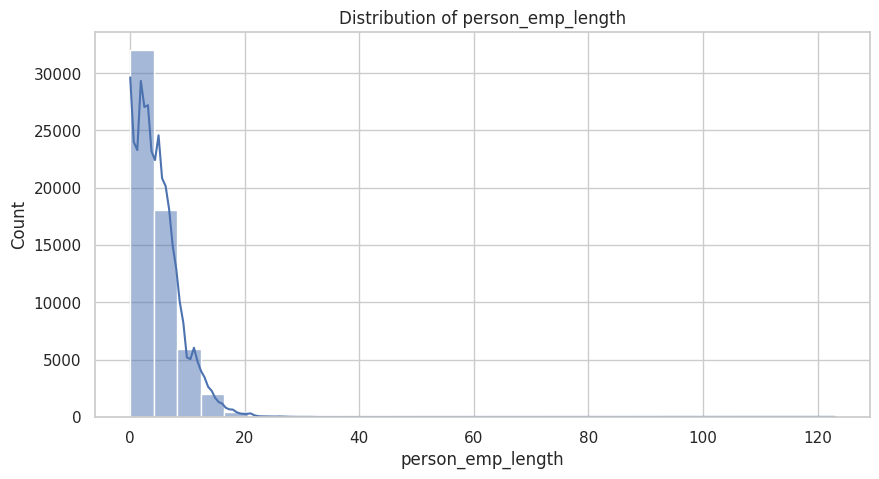

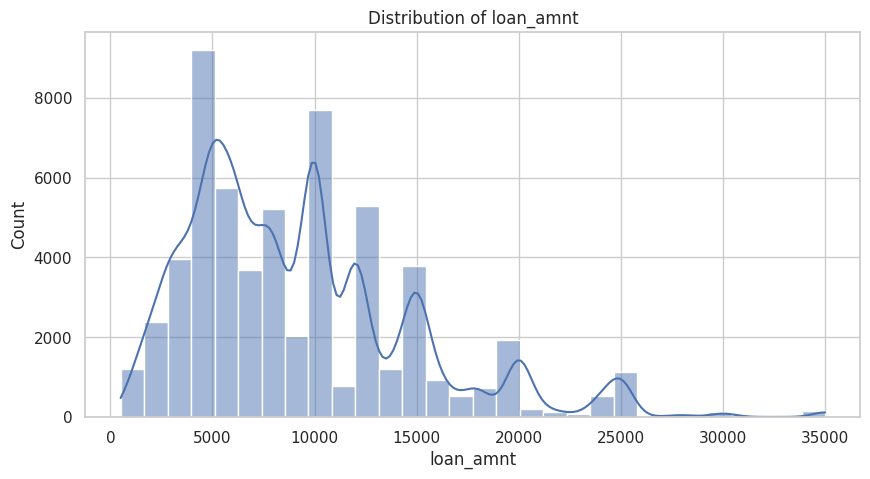

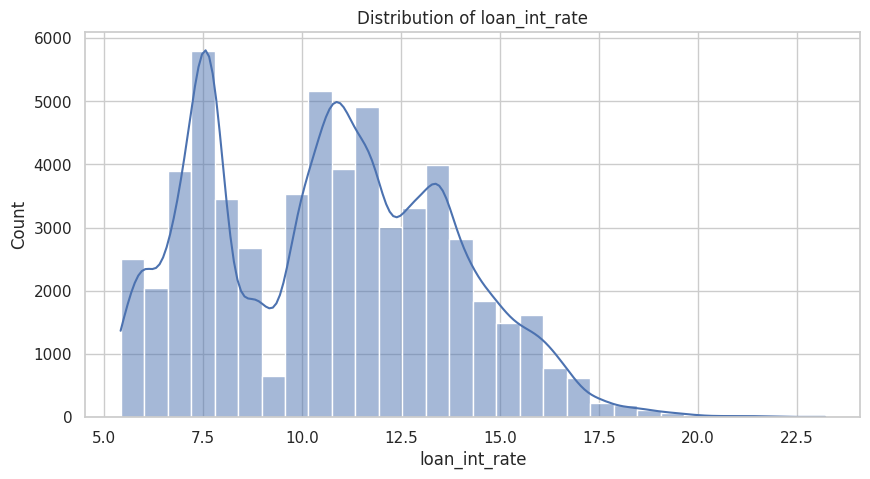

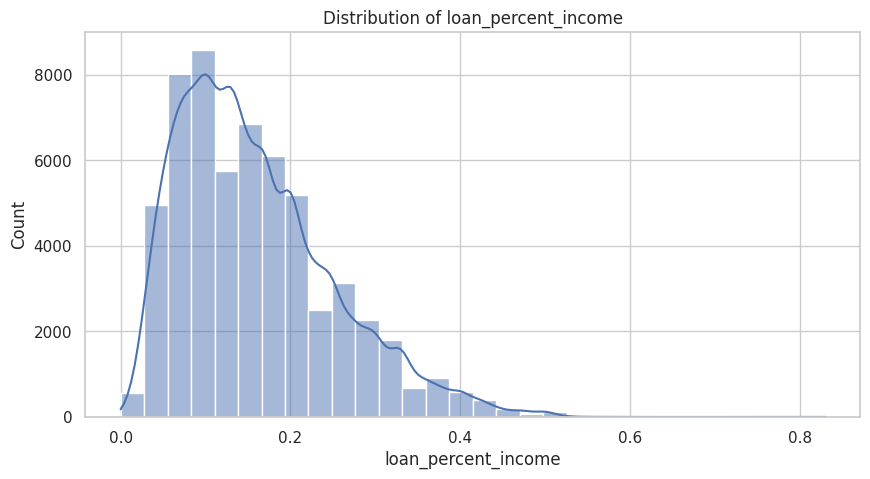

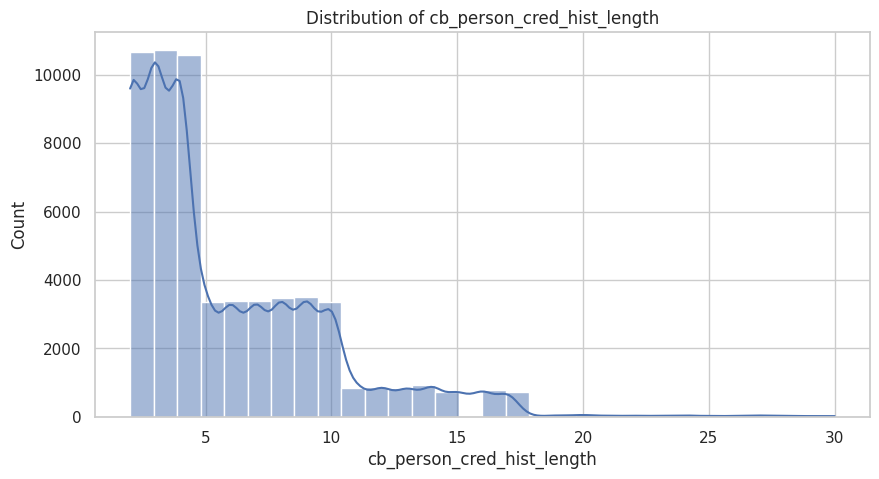

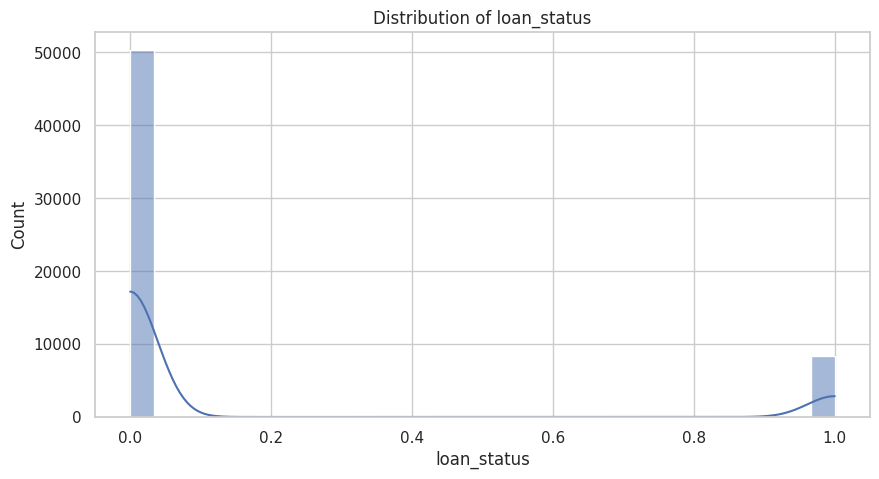

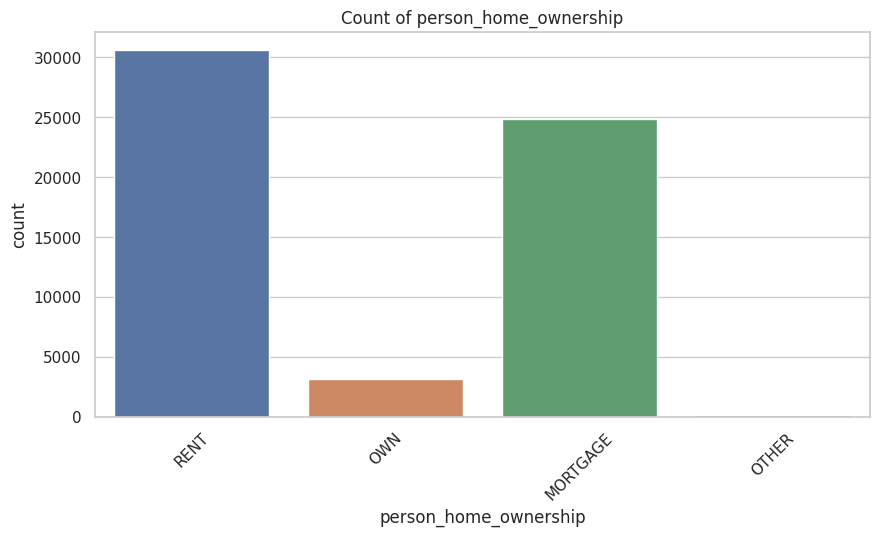

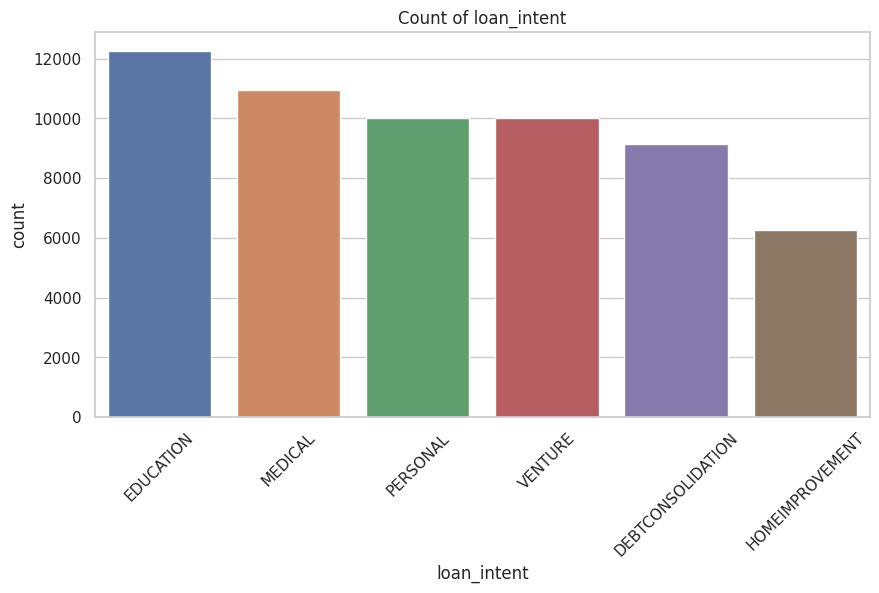

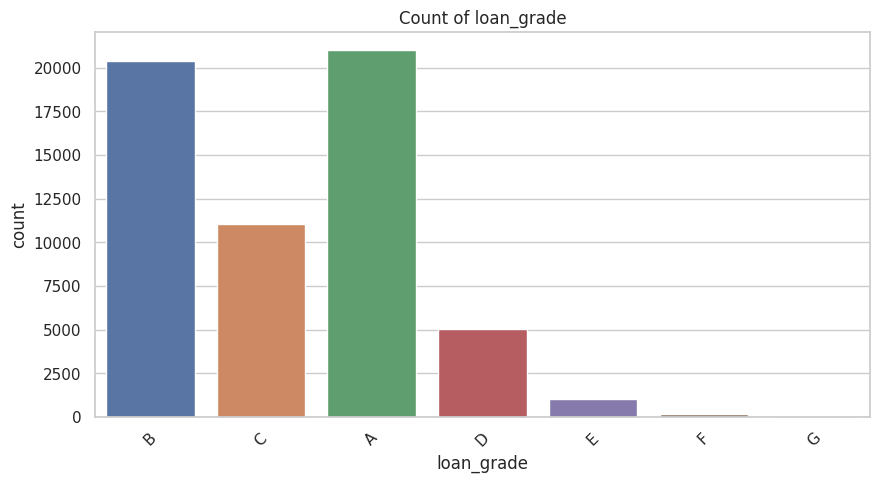

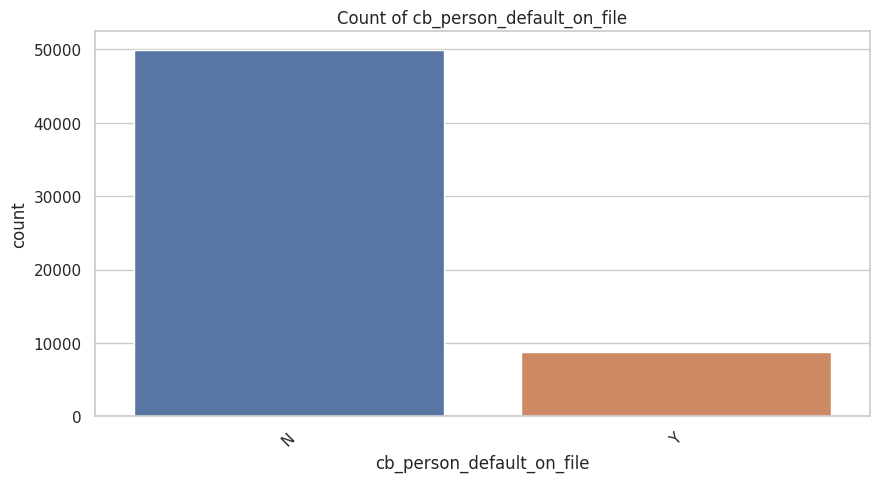

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical features statistics
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Descriptive statistics
print(train[numerical_features].describe())

# Distribution plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Categorical features statistics
categorical_features = train.select_dtypes(include=['object']).columns

# Frequency counts and bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()


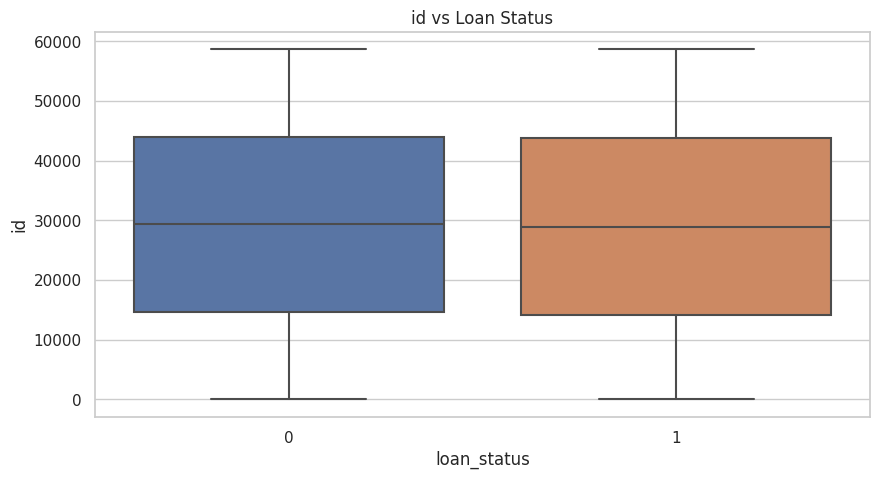

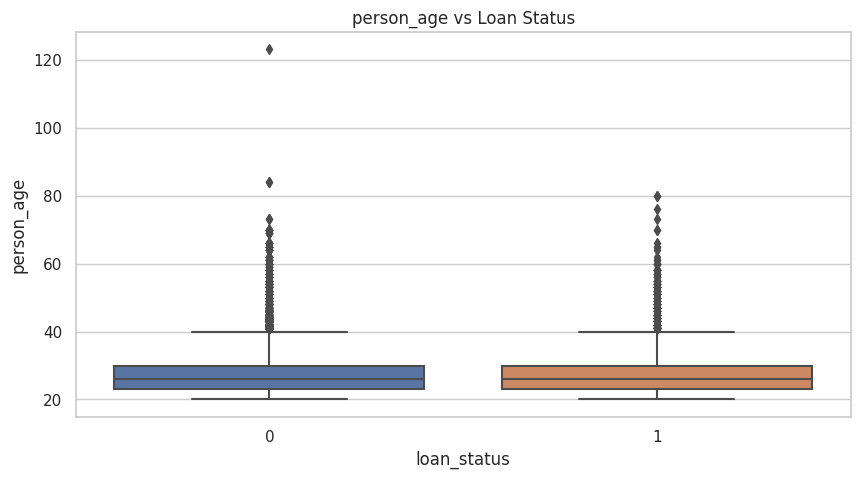

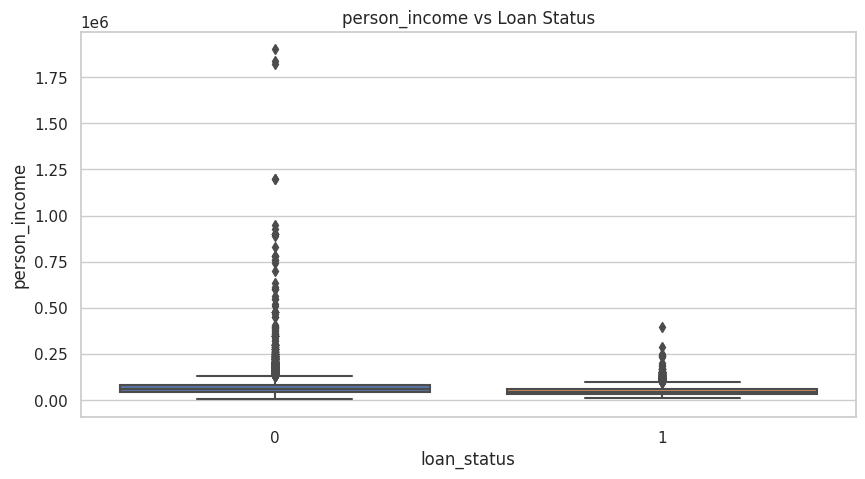

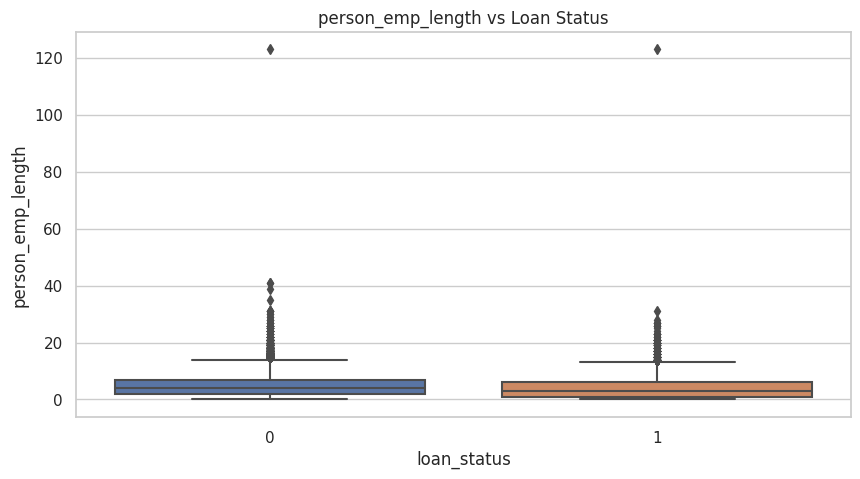

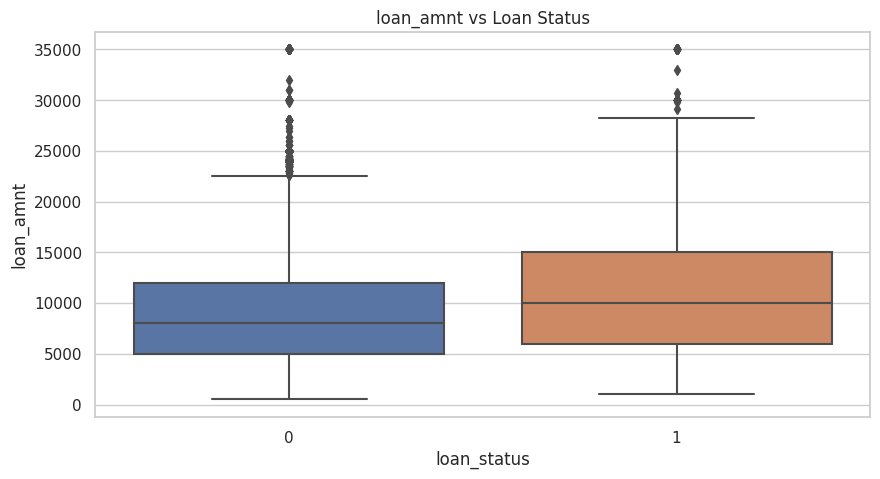

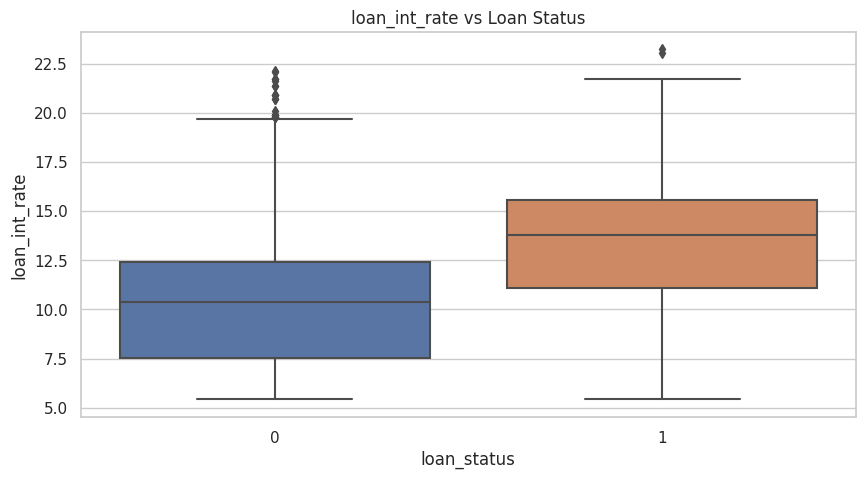

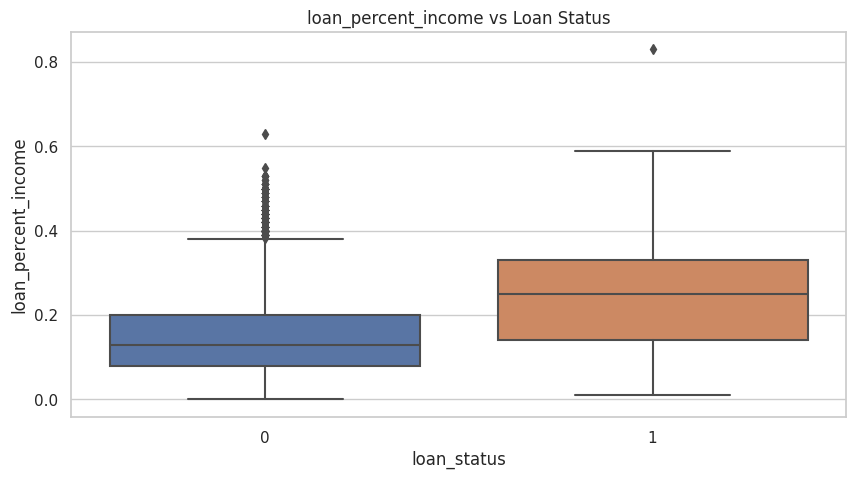

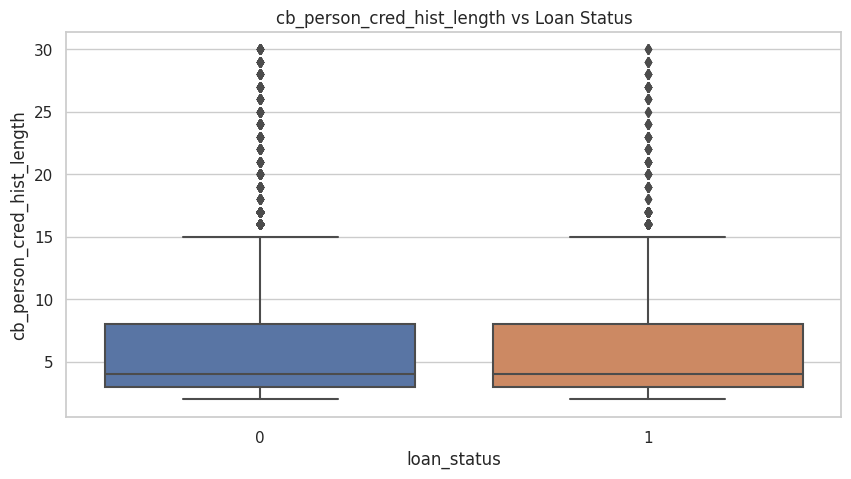

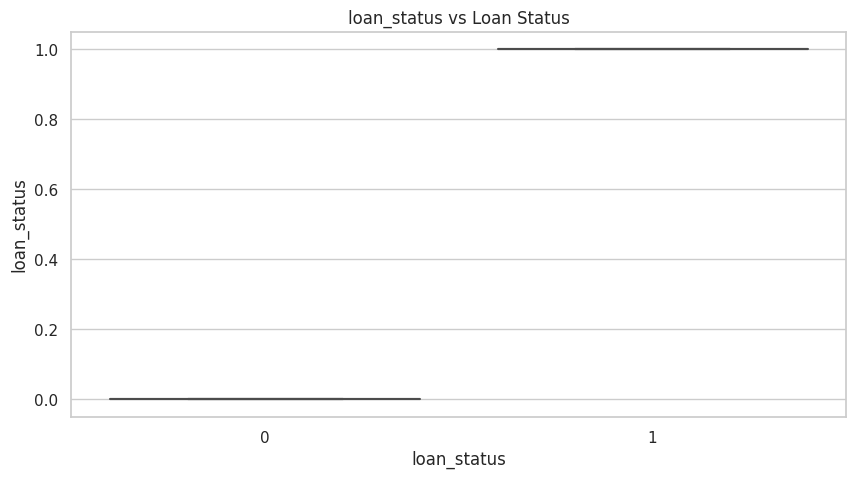

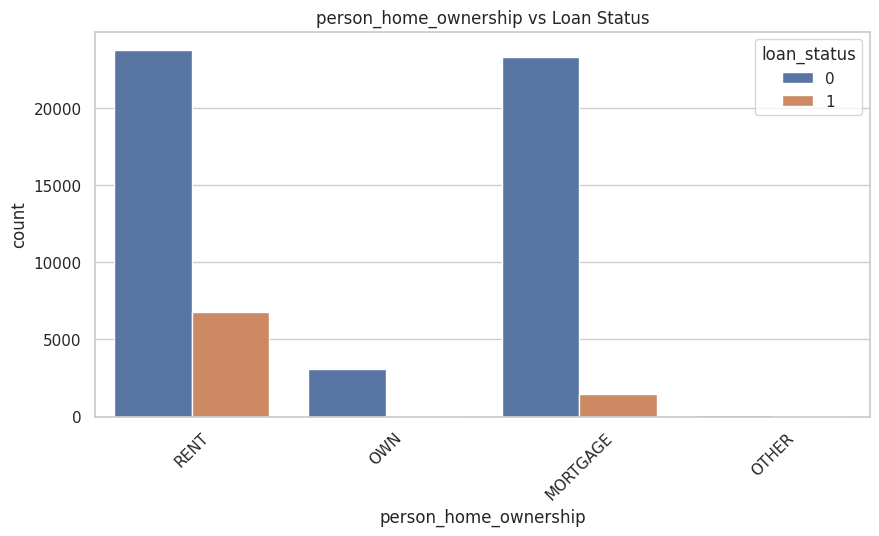

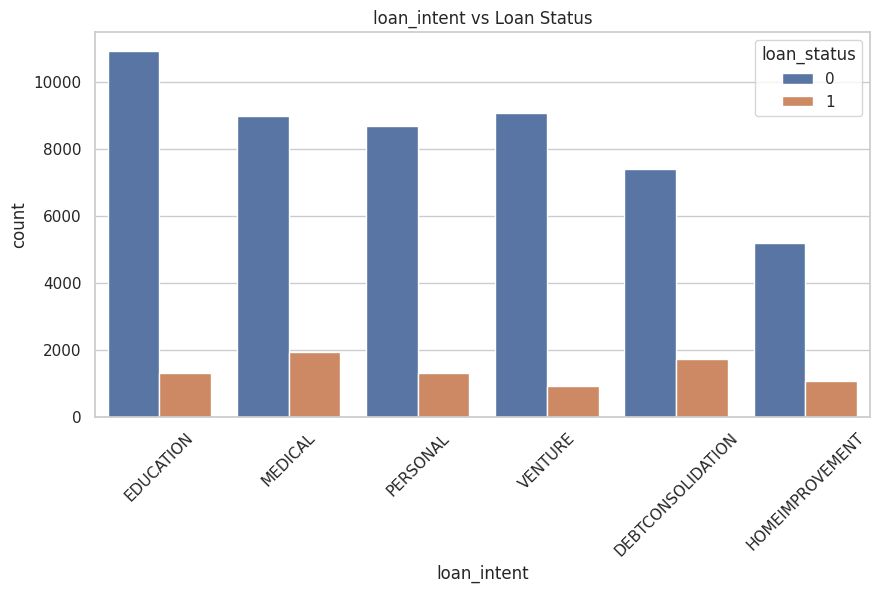

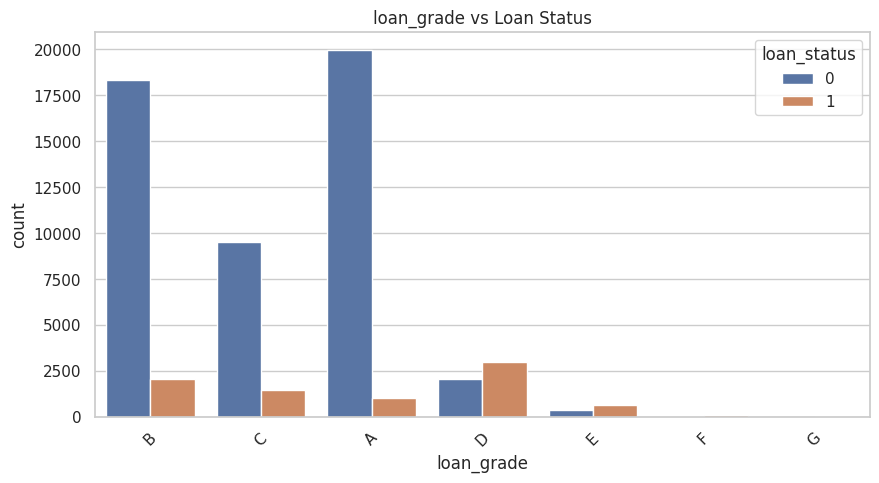

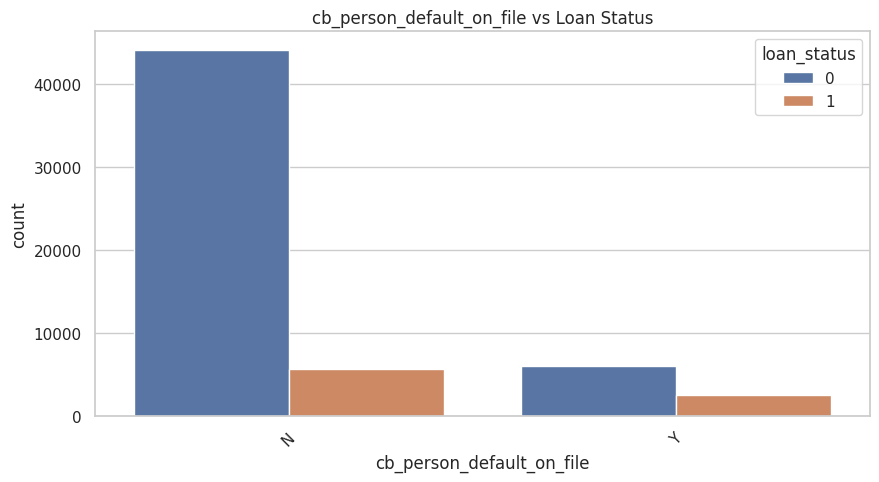

In [163]:
# Boxplots for numerical features vs loan_status
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train, x='loan_status', y=feature)
    plt.title(f'{feature} vs Loan Status')
    plt.show()

# Countplots for categorical features vs loan_status
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.xticks(rotation=45)
    plt.show()



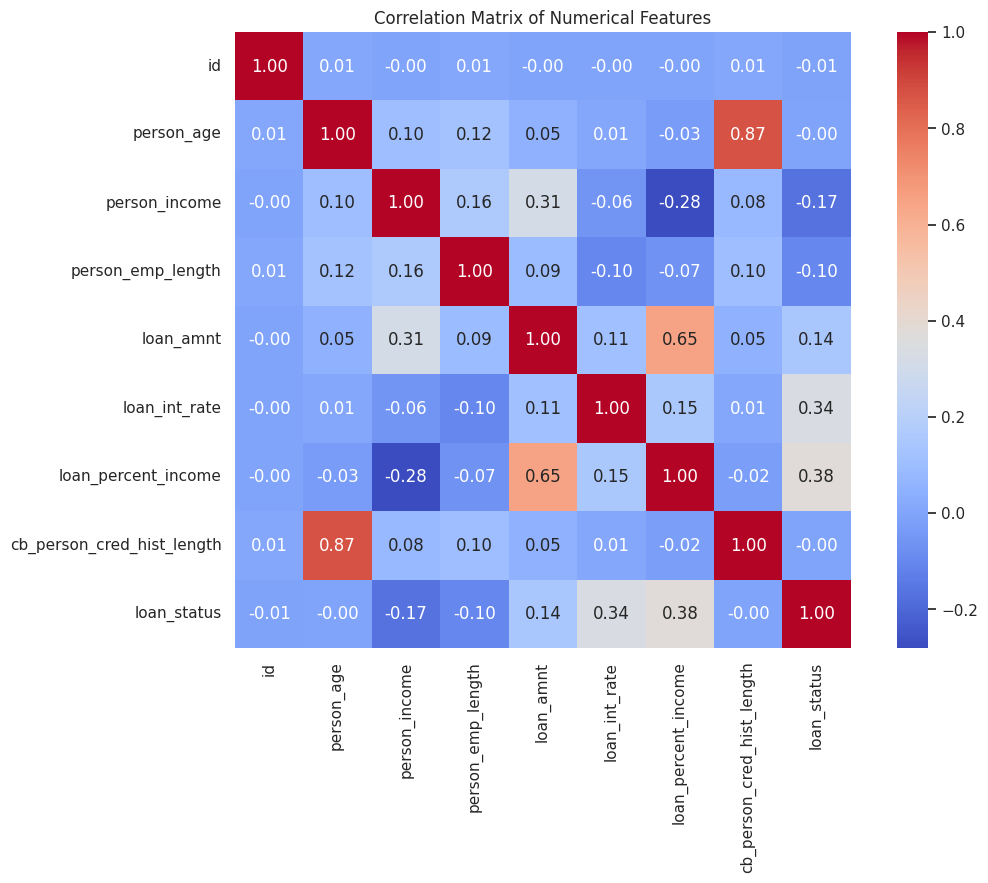

                       id  person_age  person_income  person_emp_length  \
loan_status                                                               
0            29378.138682   27.553634   66672.867720           4.863048   
1            28983.856886   27.534132   48224.661796           3.725030   

                loan_amnt  loan_int_rate  loan_percent_income  \
loan_status                                                     
0             8888.883229      10.258767             0.145105   
1            11197.271856      13.202305             0.244363   

             cb_person_cred_hist_length  loan_status  
loan_status                                           
0                              5.818531          0.0  
1                              5.783593          1.0  


In [164]:


# Correlation matrix
correlation_matrix = train[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Group By example
grouped_data = train.groupby('loan_status')[numerical_features].mean()
print(grouped_data)


<Axes: >

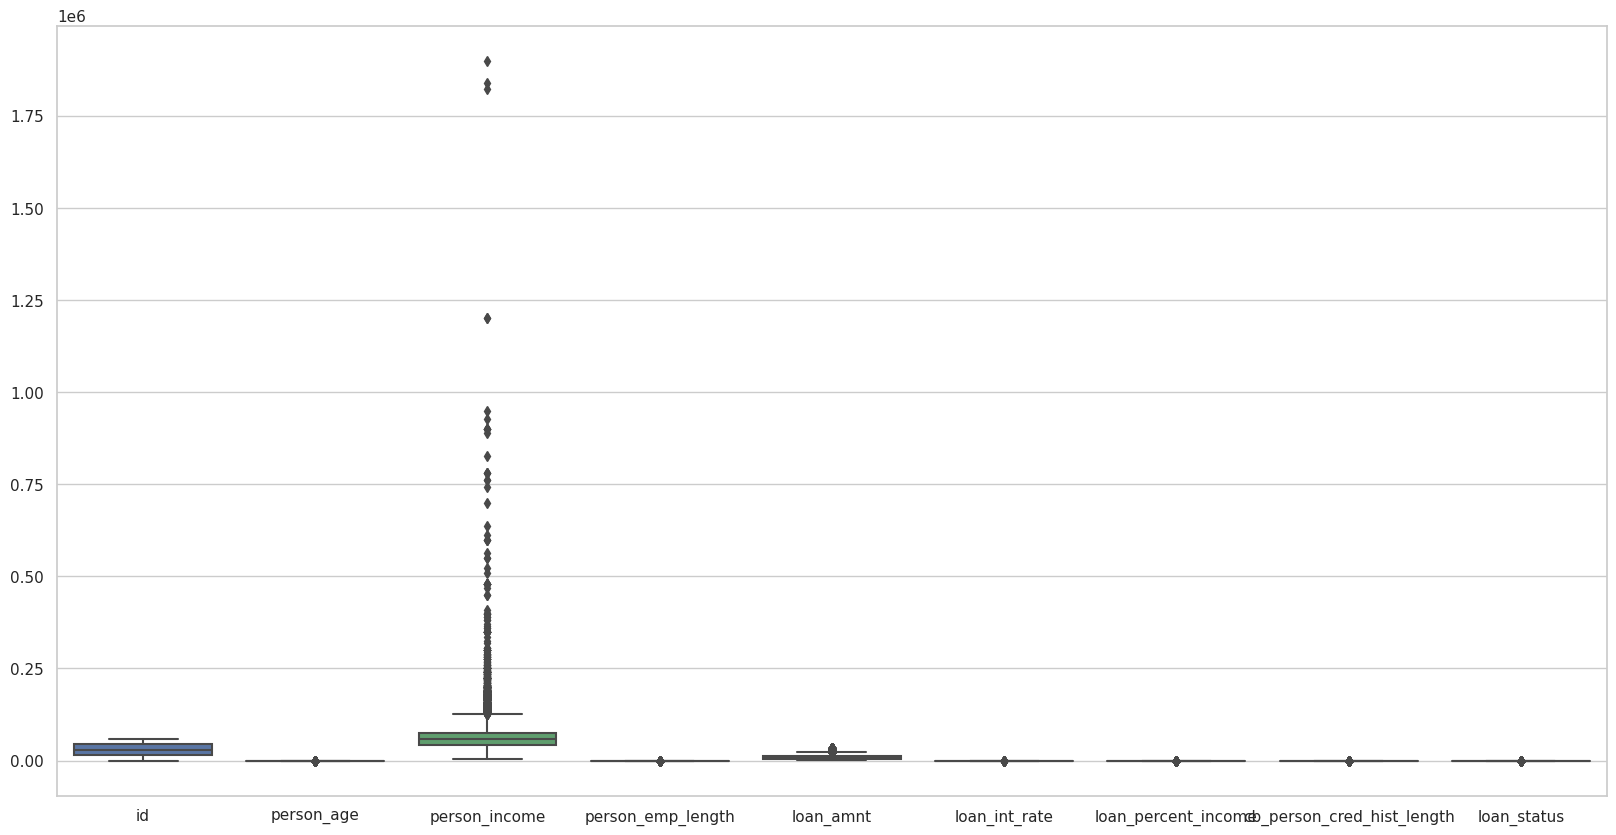

In [165]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train)

In [166]:
train = train.drop(columns='id')

# Check the remaining columns
print("Remaining columns after dropping:", train.columns)


Remaining columns after dropping: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')


In [167]:
train = train.drop(columns='cb_person_cred_hist_length')

# Check the remaining columns
print("Remaining columns after dropping:", train.columns)

Remaining columns after dropping: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'loan_status'],
      dtype='object')


In [174]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'loan_grade' column
train['loan_grade'] = label_encoder.fit_transform(train['loan_grade'])

# Apply LabelEncoder to the 'person_home_ownership' column
train['person_home_ownership'] = label_encoder.fit_transform(train['person_home_ownership'])

# Apply LabelEncoder to the 'loan_intent' column
train['loan_intent'] = label_encoder.fit_transform(train['loan_intent'])

train['cb_person_default_on_file'] = label_encoder.fit_transform(train['cb_person_default_on_file'])

# View the dataset with label encoded columns
print(train.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  loan_status  
0                          0            0  
1   

In [175]:
#Split dependent and independent features

x=train.drop(columns=["loan_status"], axis=1)
y=train["loan_status"]

In [170]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58640    0
58641    1
58642    1
58643    0
58644    0
Name: loan_status, Length: 58645, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=43)

In [178]:
#Logistic Regression

model1=LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

88.22125221661437

In [179]:
score=cross_val_score(model1, x, y, cv=5)
score

array([0.88396283, 0.88447438, 0.88191662, 0.88063774, 0.88217239])

In [180]:
#Decision Tree

model2=DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

90.58791433637975

In [181]:
score=cross_val_score(model2, x, y, cv=5)
score

array([0.90988149, 0.90860261, 0.91405917, 0.91644641, 0.91508227])

In [182]:
#Random Forest

model3=RandomForestClassifier()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

94.83699358886919

In [184]:
#K Neighbors

model4=KNeighborsClassifier()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

89.1283590233256

In [185]:
score=cross_val_score(model4, x, y, cv=5)
score

array([0.89334129, 0.89308551, 0.89385284, 0.89061301, 0.89444965])

In [186]:
test.head



<bound method NDFrame.head of           id  person_age  person_income person_home_ownership  \
0      58645          23          69000                  RENT   
1      58646          26          96000              MORTGAGE   
2      58647          26          30000                  RENT   
3      58648          33          50000                  RENT   
4      58649          26         102000              MORTGAGE   
...      ...         ...            ...                   ...   
39093  97738          22          31200              MORTGAGE   
39094  97739          22          48000              MORTGAGE   
39095  97740          51          60000              MORTGAGE   
39096  97741          22          36000              MORTGAGE   
39097  97742          31          45000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0                    3.0    HOMEIMPROVEMENT          F      25000   
1                    6.0           PERSONAL        

In [ ]:
test = test.drop(columns=['id', 'cb_person_cred_hist_length'])

In [187]:
test['loan_grade'] = label_encoder.fit_transform(test['loan_grade'])
test['person_home_ownership'] = label_encoder.fit_transform(test['person_home_ownership'])
test['loan_intent'] = label_encoder.fit_transform(test['loan_intent'])
test['cb_person_default_on_file'] = label_encoder.fit_transform(test['cb_person_default_on_file'])

In [188]:
test.head

<bound method NDFrame.head of           id  person_age  person_income  person_home_ownership  \
0      58645          23          69000                      3   
1      58646          26          96000                      0   
2      58647          26          30000                      3   
3      58648          33          50000                      3   
4      58649          26         102000                      0   
...      ...         ...            ...                    ...   
39093  97738          22          31200                      0   
39094  97739          22          48000                      0   
39095  97740          51          60000                      0   
39096  97741          22          36000                      0   
39097  97742          31          45000                      3   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
0                    3.0            2           5      25000          15.76   
1                  

In [190]:
test = test.drop(columns=['id', 'cb_person_cred_hist_length'])

In [197]:
predictions = model3.predict(test)
predictions

array([1, 0, 1, ..., 0, 0, 1])

In [202]:
test_probabilities = model3.predict_proba(test)[:, 1]
test_probabilities

array([0.95, 0.  , 0.69, ..., 0.01, 0.4 , 0.98])

In [194]:
test1 = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

In [196]:
test_ids = test1['id']

In [208]:
submission = pd.DataFrame({
    'id': test_ids,  # Use the saved 'id' column
    'loan_status': test_probabilities  # Predicted probabilities for loan_status = 1
})


In [209]:
submission.to_csv('submission.csv', index=False)

In [210]:
print(submission.head())

      id  loan_status
0  58645         0.95
1  58646         0.00
2  58647         0.69
3  58648         0.00
4  58649         0.19


In [211]:
#Submissions are evaluated using area under the ROC curve using the predicted probabilities and the ground truth targets.
#score 0.93918 using Random Forest Classifier